# Entanglement

**Companion notebook for:** [`entanglement-is-not-magic.md`](./entanglement-is-not-magic.md)

This notebook demonstrates:
- What entanglement actually is (math that doesn't factor)
- Creating Bell states
- Measurement correlations
- Why it's not faster-than-light communication

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_state_qsphere
from qiskit_aer import Aer

np.set_printoptions(precision=3,suppress=True)

## 1. Creating Entanglement - Bell State

The simplest entangled state: |Φ+⟩ = (|00⟩ + |11⟩)/√2

Bell state |Φ+⟩: [0.707+0.j 0.   +0.j 0.   +0.j 0.707+0.j]

Expanded: (|00⟩ + |11⟩)/√2

Try to factor this as |qubit0⟩ ⊗ |qubit1⟩...
It's impossible! This is entanglement.


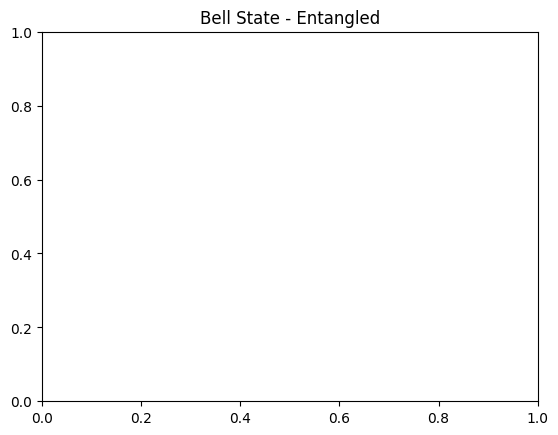

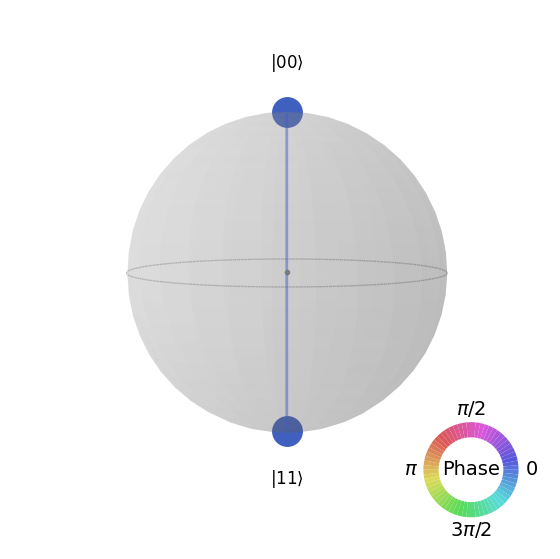

In [7]:
# Standard recipe for entanglement
qc = QuantumCircuit(2)
qc.h(0)      # Create superposition on first qubit
qc.cx(0, 1)  # CNOT creates entanglement

state = Statevector(qc)
print("Bell state |Φ+⟩:", state.data)
print("\nExpanded: (|00⟩ + |11⟩)/√2")
print("\nTry to factor this as |qubit0⟩ ⊗ |qubit1⟩...")
print("It's impossible! This is entanglement.")

# Visualize
fig = plot_state_qsphere(state)
plt.title('Bell State - Entangled')
plt.show()
display(fig)

## 2. Mathematical Test for Entanglement

A state is entangled if it **cannot** be written as a tensor product.

In [3]:
# Separable state (NOT entangled)
qc_sep = QuantumCircuit(2)
qc_sep.h(0)
qc_sep.h(1)
state_sep = Statevector(qc_sep)

# Entangled state
qc_ent = QuantumCircuit(2)
qc_ent.h(0)
qc_ent.cx(0, 1)
state_ent = Statevector(qc_ent)

print("Separable state (|+⟩ ⊗ |+⟩):")
print(state_sep.data)
print("\nThis equals: (|0⟩+|1⟩)/√2 ⊗ (|0⟩+|1⟩)/√2")
print("           = (|00⟩+|01⟩+|10⟩+|11⟩)/2")
print("→ Factorizable! Not entangled.\n")

print("Entangled state (|Φ+⟩):")
print(state_ent.data)
print("\nThis is (|00⟩ + |11⟩)/√2")
print("Can't write as |qubit0⟩ ⊗ |qubit1⟩")
print("→ Not factorizable! Entangled.")

Separable state (|+⟩ ⊗ |+⟩):
[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]

This equals: (|0⟩+|1⟩)/√2 ⊗ (|0⟩+|1⟩)/√2
           = (|00⟩+|01⟩+|10⟩+|11⟩)/2
→ Factorizable! Not entangled.

Entangled state (|Φ+⟩):
[0.707+0.j 0.   +0.j 0.   +0.j 0.707+0.j]

This is (|00⟩ + |11⟩)/√2
Can't write as |qubit0⟩ ⊗ |qubit1⟩
→ Not factorizable! Entangled.


## 3. Measurement Correlations

Entangled qubits show perfect correlations.

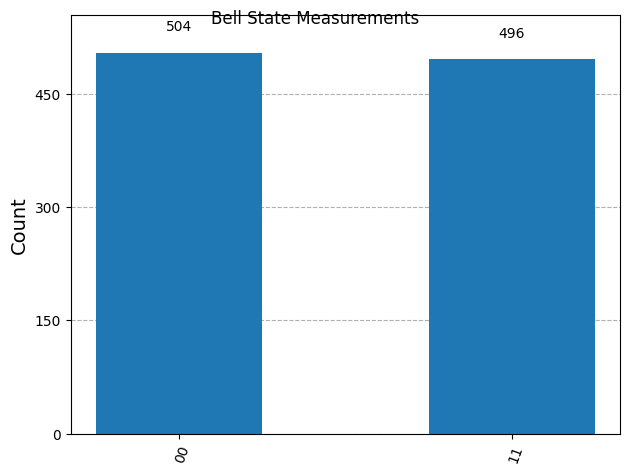

Results: {'11': 496, '00': 504}

Observations:
  • We only see |00⟩ or |11⟩, never |01⟩ or |10⟩
  • When qubit 0 is 0, qubit 1 is ALWAYS 0
  • When qubit 0 is 1, qubit 1 is ALWAYS 1
  • Perfect correlation!


: 

In [ ]:
# Create Bell state and measure
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

backend = Aer.get_backend('qasm_simulator')
job = backend.run(transpile(qc, backend), shots=1000)
counts = job.result().get_counts()

# In notebooks, explicitly display the figure returned by plot_histogram
fig = plot_histogram(counts)
fig.suptitle('Bell State Measurements')
display(fig)

print("Results:", counts)
print("\nObservations:")
print("  • We only see |00⟩ or |11⟩, never |01⟩ or |10⟩")
print("  • When qubit 0 is 0, qubit 1 is ALWAYS 0")
print("  • When qubit 0 is 1, qubit 1 is ALWAYS 1")
print("  • Perfect correlation!")

## 4. Entanglement ≠ Communication

Looking at one qubit alone shows no pattern.

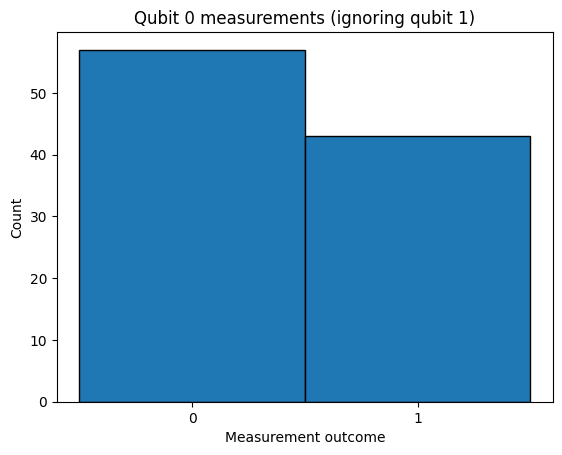

Qubit 0: ~0.43 (close to 50/50)

→ Looking at one qubit alone shows random 50/50!
→ The correlation only appears when comparing both.
→ This is why entanglement can't send messages.


In [5]:
# Measure just the first qubit many times
qubit0_results = []
shots = 100

for _ in range(shots):
    qc = QuantumCircuit(2, 1)
    qc.h(0)
    qc.cx(0, 1)
    qc.measure(0, 0)  # Measure only qubit 0
    
    job = backend.run(transpile(qc, backend), shots=1)
    result = list(job.result().get_counts().keys())[0]
    qubit0_results.append(int(result))

# Plot distribution
plt.hist(qubit0_results, bins=[-0.5, 0.5, 1.5], edgecolor='black')
plt.xlabel('Measurement outcome')
plt.ylabel('Count')
plt.title('Qubit 0 measurements (ignoring qubit 1)')
plt.xticks([0, 1])
plt.show()

print(f"Qubit 0: ~{sum(qubit0_results)/len(qubit0_results):.2f} (close to 50/50)")
print("\n→ Looking at one qubit alone shows random 50/50!")
print("→ The correlation only appears when comparing both.")
print("→ This is why entanglement can't send messages.")

## 5. All Four Bell States

There are four maximally entangled 2-qubit states.

In [6]:
def create_bell_state(variant):
    qc = QuantumCircuit(2, 2)
    
    # All start with H and CNOT
    qc.h(0)
    qc.cx(0, 1)
    
    # Add variations
    if variant == 'Ψ+':
        qc.x(0)
    elif variant == 'Φ-':
        qc.z(0)
    elif variant == 'Ψ-':
        qc.x(0)
        qc.z(0)
    
    return qc

bell_states = ['Φ+', 'Ψ+', 'Φ-', 'Ψ-']

for name in bell_states:
    qc = create_bell_state(name)
    state = Statevector(qc)
    print(f"|{name}⟩ = {state.data}")

print("\nAll four are maximally entangled.")
print("They differ in which pairs have correlations.")

|Φ+⟩ = [0.707+0.j 0.   +0.j 0.   +0.j 0.707+0.j]
|Ψ+⟩ = [0.   +0.j 0.707+0.j 0.707+0.j 0.   +0.j]
|Φ-⟩ = [ 0.707+0.j  0.   +0.j  0.   +0.j -0.707+0.j]
|Ψ-⟩ = [ 0.   +0.j -0.707+0.j  0.707+0.j  0.   +0.j]

All four are maximally entangled.
They differ in which pairs have correlations.


## Summary

From this notebook, you should understand:

1. **Entanglement = unfactorable** — can't write as tensor product
2. **Bell states** — simplest maximally entangled states
3. **Measurement correlations** — outcomes are linked
4. **Not communication** — individual qubit looks random
5. **The resource** — entanglement enables quantum advantage

**Next:** [Qiskit Basics](../04-qiskit-basics/first-circuit.ipynb)  
Where we finally write code with our intuition fully armed.